# Introduction

### Why data visualization?

Nowadays, data visualization becomes an essential component in data analysis process. Data can tell stories, and visualization could help data analysts present these stories in a clear and understandable way. Currently, Python already have many visualization tools, such as matplotlib, seaborn, bokeh, ggplot and so on. Although they all have unique features and are commonly used, this tutorial will introduce Plotly. 

### Why Plotly?

First, each tool has its advantages. Matplotlib is the most commonly used package, Seaborn is very suitable to statistic charts, while ggplot is transformed from R package and is very famous. However, Plotly is a bit different from them. It is not only a Python package, but a open source platform for creating, editing and sharing data visualization. It supports Python, R, matlab and many languages, but also has a cloud server to store all graphs you composed within your account. After you plot in code, you can easily editing and adjusting parameters on the website. 

Because we are using Python for this course, this tutorial will only introduce the Python library.

First, let us look at some fancy graphs drawed by plotly. 

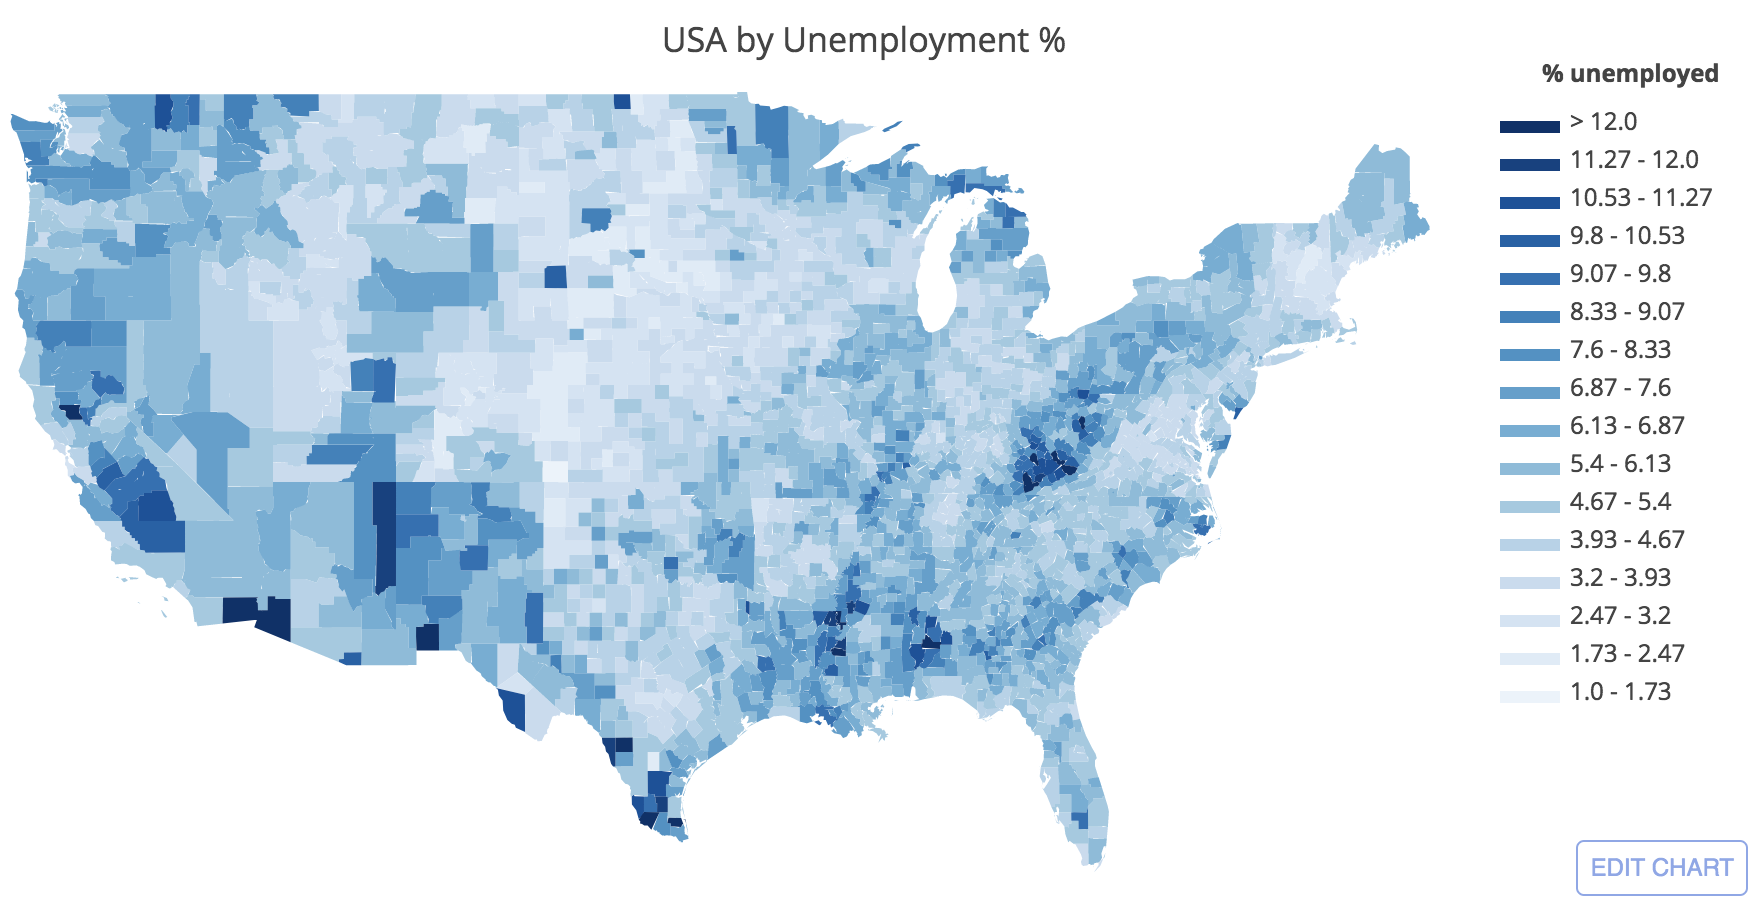
(Cited from https://plot.ly/python/county-choropleth/)


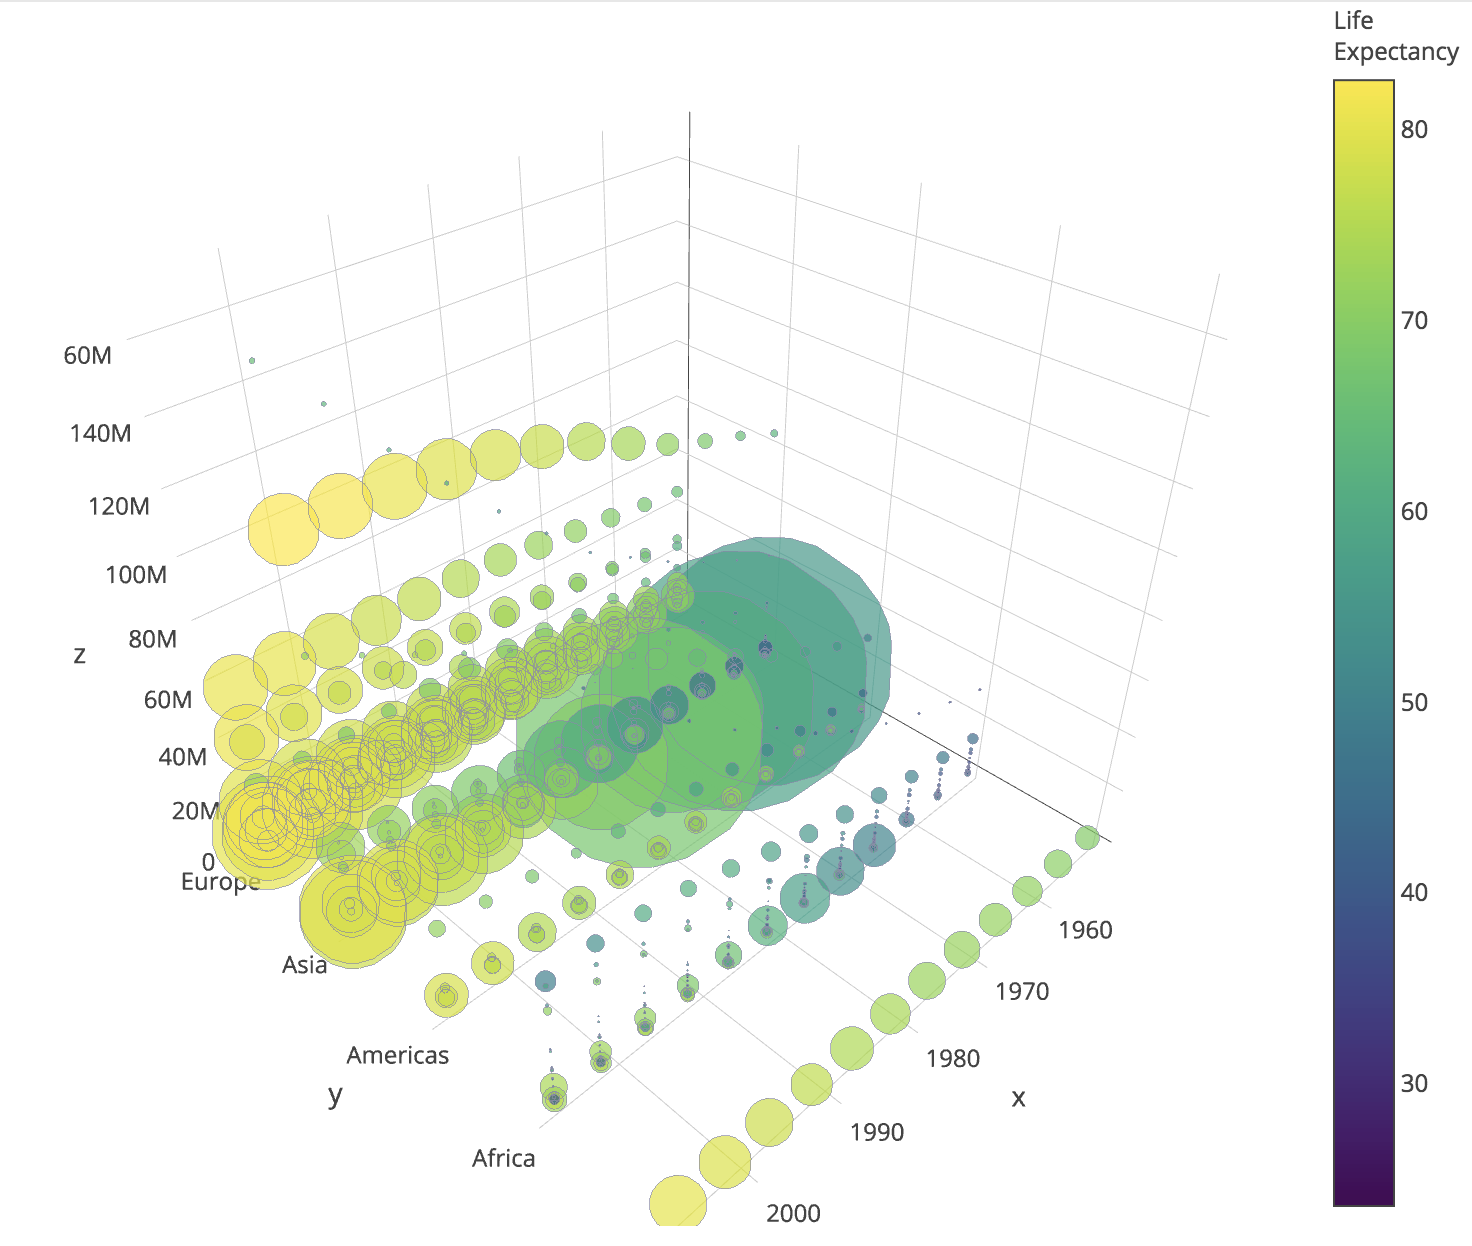
(Cited from https://plot.ly/python/3d-bubble-charts/)

# Tutorial content

- [Installation and Settings](#Installation-and-Settings)
- [Start with simple charts](#Start-with-simple-charts)
- [Example 1: Land price visualization](#Example-1:-Land-price-visualization)
- [Example 2: Geospatial analysis visualization](#Example-2:-Geospatial-analysis-visualization)
- [Transform functions](#Transform-functions)

# Installation and Settings

Actually, drawing these fancy charts by using plotly is quite easy. Let us install plotly and have a try. You can simply do pip install as follows:

    $ pip install plotly

or

    $ sudo pip install plotly 

It can also be installed by Anaconda.

Then, before we start, we should aware that Plotly provides two option when drawing, draw it online, or offline. Here I will only introduce the online option, cause it is one of the charm of Plotly. The online option requires us to create an account on plotly website (either a free one or a premium one), and connect it with our online notebook by setting credentials. For drawing offline, you can refer to this instruction: https://plot.ly/python/offline/

In [38]:
import warnings
warnings.filterwarnings("ignore")

import plotly
plotly.tools.set_credentials_file(username='yakki77', api_key='48BSO8YQcnjCaZXDbY1w')


Api-key can be found in "APT-settings" on the website. Like the following my settings:

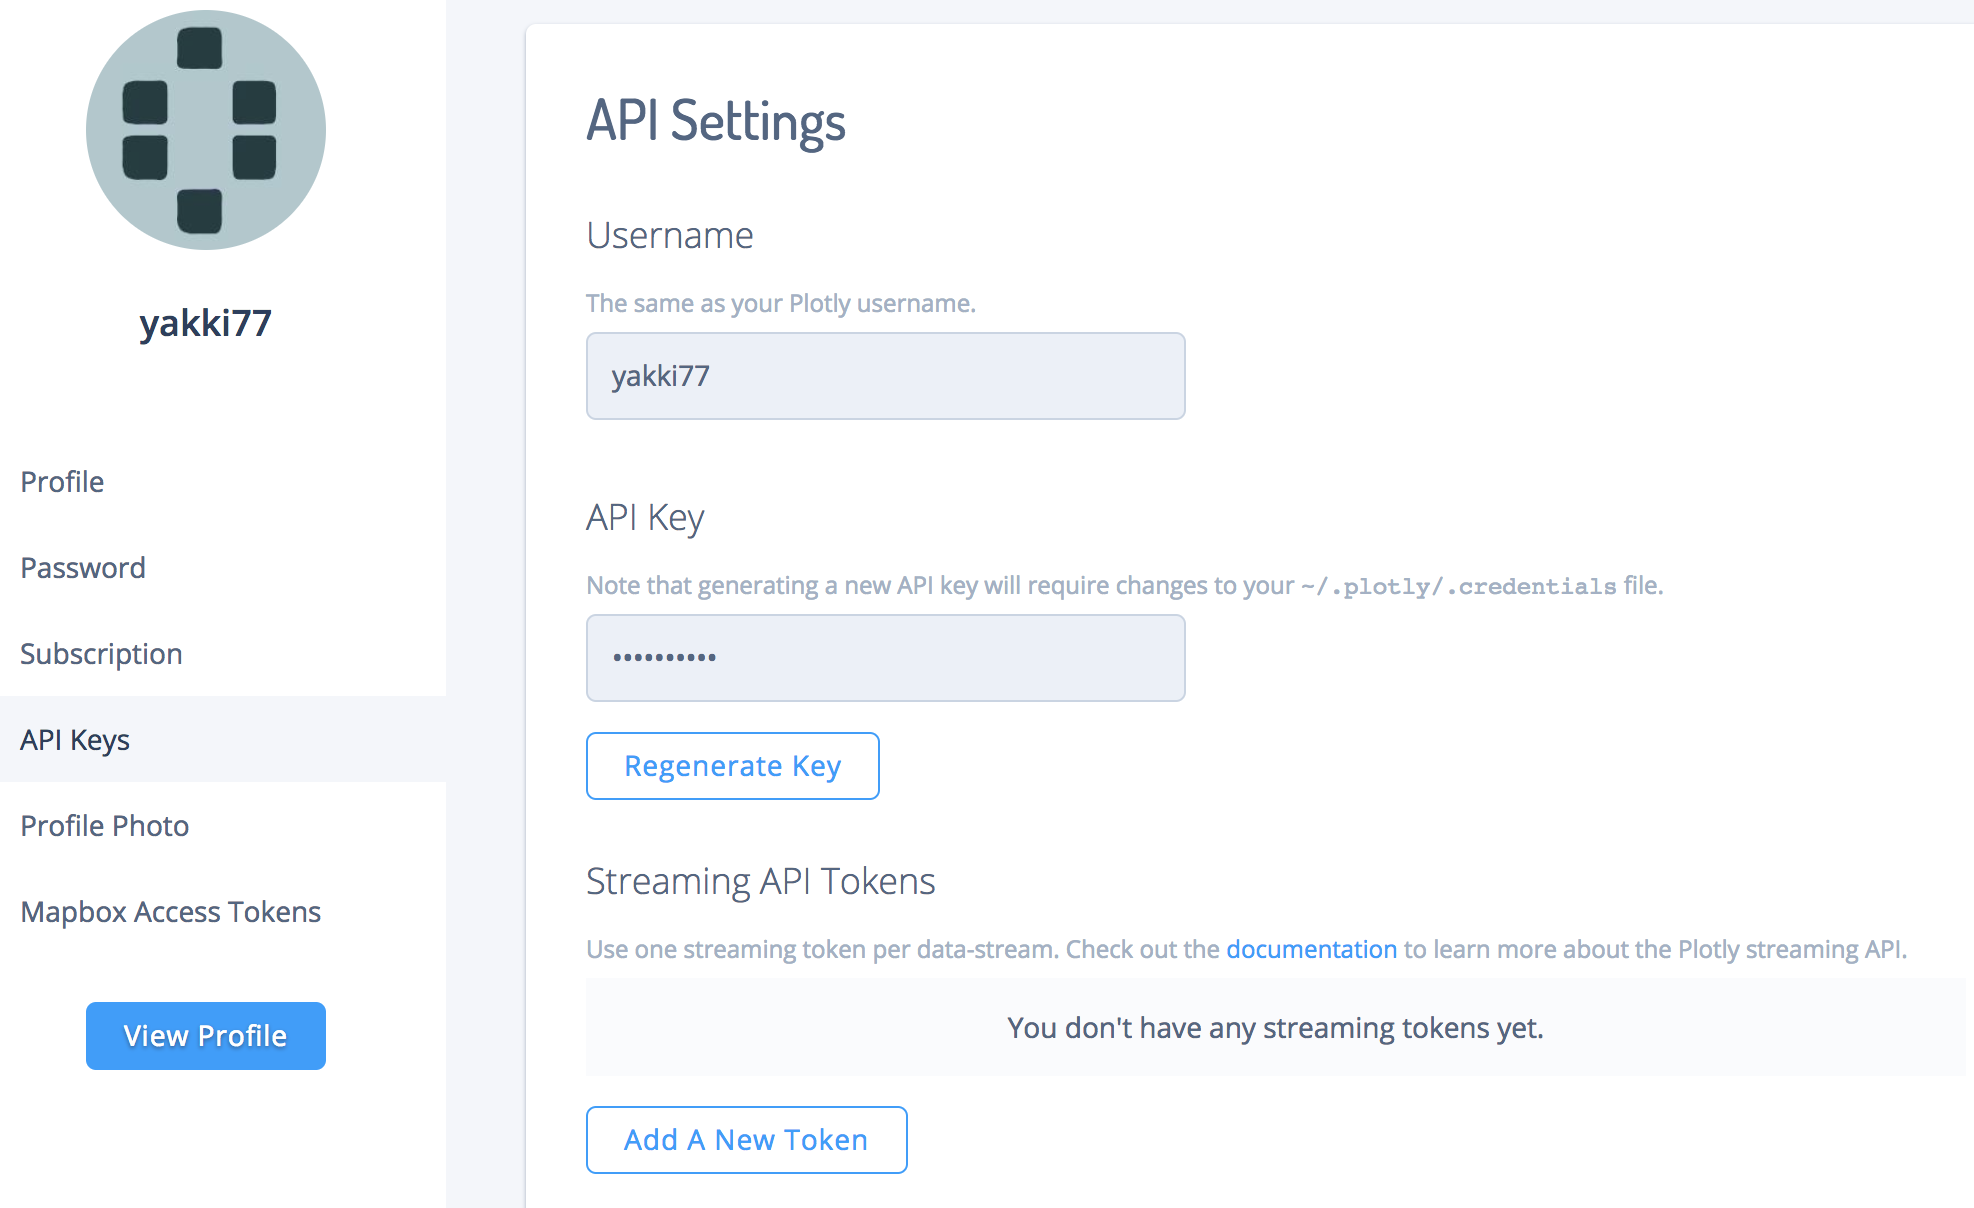

Then all pictures generated on online notebook will be stored in that accout. We can manage and edit them through simple web interaction. 

Let us take a simple chart of random numbers as an example, to see how it works.

# Start with simple charts

Let us firstly try to draw a scatter graph by using some random numbers.

In [39]:
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np

# Generate some random data
N = 500

# Create a trace
trace1 = go.Scatter(x = np.random.randn(N), y = np.random.randn(N), mode = "markers", name = "scatter1")

trace2 = go.Scatter(x = np.random.randn(N),y = np.random.randn(N), mode = "markers", name = "scatter2")

data = [trace1, trace2]
py.iplot(data, filename="random_scatter")



A trace is a graph object with plently of arguments, such as mode, name, text, marker and etc. Traces can be plotted into a same chart for comparison. Full reference of the functions for each arguments could be found here: https://plot.ly/python/reference/ 

However, in real-life data visualization, we need to handle the raw data, in order to get meaningful stories. So, let us try a simple native dataset within sklearn package, iris flower dataset. 

In [40]:
from sklearn import datasets
iris = datasets.load_iris()


Iris dataset has five features, sepal length, sepal width, petal lenth, petal width and species. Species here are represented by 0, 1, 2. We first plot the relationship between petal length and petal width for all three species. 

In [41]:

species = iris.target

trace = go.Scatter(x = iris.data[:, 2], y = iris.data[:, 3], mode = 'markers',
    marker = dict(
        color = species,
        showscale = True
    ))

# We can customize the layout of our graph, such as definting the tile and axises, by creating a layout object.
layout = go.Layout(xaxis = dict(title = 'Petal length'), yaxis = dict(title = 'Petal width'))

data = [trace]

# We need to create a figure object to apply our layout setting
figure = go.Figure(data = data,layout = layout)

# Pass our figure object to plot the chart
py.iplot(figure, filename="iris_scatter")



High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~yakki77/0 or inside your plot.ly account where it is named 'iris_scatter'


This graph clearly tells audience that virginica has largest petal length and width, while setosa has the smallest. You can explore the function bar on the right top, and 'EDIT CHART' button on the right botton by yourselves. 

# Example 1: Land price visualization

Previous charts are simple and easy to understand. But how about dealing with complicated data in life? Let us look at a dataset from http://datatoolkits.lincolninst.edu/subcenters/land-values/land-prices-by-state.asp. The orignal excel data has already been transformed to csv format.

This dataset describes the quartly home value, land value, structure cost, land share, home price index and land price index of all US states. We firstly pick the data of Pennsylvania state and plot the relationship between home value, land value and structure cost over 30 years.

In [51]:
import pandas as pd
land_price = pd.read_csv("land_price.csv")
land_price_PA = land_price[6270:6435]

# See the structure of this dataset
print(land_price_PA[0:5])

     STATE    Date   Home Value  Structure Cost   Land Value  \
6270    PA  1975Q1  30378.52732     27342.86474  3035.662582   
6271    PA  1975Q2  30806.05111     27552.01982  3254.031288   
6272    PA  1975Q3  31263.61902     27691.74627  3571.872753   
6273    PA  1975Q4  31709.77697     27851.54838  3858.228584   
6274    PA  1976Q1  32185.27714     28107.73833  4077.538801   

      Land Share (Pct)  Home Price Index  Land Price Index  
6270          0.099928          0.242745          0.001543  
6271          0.105630          0.246162          0.001656  
6272          0.114250          0.249818          0.001821  
6273          0.121673          0.253383          0.001971  
6274          0.126690          0.257183          0.002090  


In [52]:
trace1 = go.Scatter(x = land_price_PA['Date'], y = land_price_PA['Home Value'], name = 'Home value',)

trace2 = go.Scatter(x = land_price_PA['Date'], y = land_price_PA['Structure Cost'], name = 'Structure cost',)

trace3 = go.Scatter(x = land_price_PA['Date'], y = land_price_PA['Land Value'], name = 'Land Value')

data = [trace1, trace2, trace3]
py.iplot(data, filename="land_price1")


We can easily compare the exact numbers of each point by hovering on the chart. 

However, if we want to visualize the dataset in a higher dimension, such as plotting the relationship between quartly home value accross states, we could choose a 3D chart.

Here, we only choose the first five states' data for efficiency. 

In [53]:
# The first five states
land_price_5states = land_price[0: 824]

# Group the dataframe by state
lp5 = land_price_5states.groupby('STATE')


Then, because there are five traces for the five states, we can use a for loop to add traces to the data list.


In [54]:
states = ['AL', 'AK', 'AZ', 'AR', 'CA']
data = []

for state in states:
    group = lp5.get_group(state)
    home_value = group['Home Value'].tolist()
    date = group['Date'].tolist()
    
    # y axis is state, so we make the state coordinate a list of same length with date and home value
    length = len(date)
    state_coordinate = [state] * length
    
    # Use for loop to add traces
    data.append(dict(type = 'scatter3d', mode = 'lines', x = date, y = state_coordinate, z = home_value, name = state))

py.iplot(data, filename = 'Home value accross states')




This chart can also be customized by simply adding more attributes in each trace, or generating a layout object. You can have a try by yourself, but this tutorial will not dig into that. 

# Example 2: Geospatial analysis visualization

Except the above traditional trend analysis, geospatial analysis is also an important part in real world data analysis. Geospatial data can tell features and insight over regions. Therefore, clear and attractive graphs can give audience a better understanding. Although there are specific tools for Geospatial analysis, such as ArcGIS, Plotly is also able to do some simple visualization easily. 

Let us try an example dataset from Kaggle: https://www.kaggle.com/stevepalley/2016uspresidentialvotebycounty/data

This dataset describes the County-level data on 2016 US presidential voting. 

In [55]:
voting = pd.read_csv('pres16results.csv')

Cause the first 31 rows are the aggregate voting information, we cut from the 32nd row to see the data accross each state.

In [56]:
voting = voting.dropna(axis=0, how='any', subset=['st'])
voting = voting[32:]

# See the structure of this dataset
print(land_price_PA[0:5])

     STATE    Date   Home Value  Structure Cost   Land Value  \
6270    PA  1975Q1  30378.52732     27342.86474  3035.662582   
6271    PA  1975Q2  30806.05111     27552.01982  3254.031288   
6272    PA  1975Q3  31263.61902     27691.74627  3571.872753   
6273    PA  1975Q4  31709.77697     27851.54838  3858.228584   
6274    PA  1976Q1  32185.27714     28107.73833  4077.538801   

      Land Share (Pct)  Home Price Index  Land Price Index  
6270          0.099928          0.242745          0.001543  
6271          0.105630          0.246162          0.001656  
6272          0.114250          0.249818          0.001821  
6273          0.121673          0.253383          0.001971  
6274          0.126690          0.257183          0.002090  


Let us look at the winner in each state. First, we need to get a shorter version of data, only includes the state and winner information. Then, in order to represent Hillary Clinton and Donald Trup in different color, we could create a column of dummy variables in the data.

In [57]:
states = voting['st'].drop_duplicates().dropna().tolist()
voting_states = voting.groupby(['st'])

# Create dummy list, 0 for Hillary Clinton, 1 for Donald Trump
winner = []
votes = []

for s in states:
    group = voting_states.get_group(s)
    hc = group.groupby('cand')['votes'].sum()['Hillary Clinton']
    dt = group.groupby('cand')['votes'].sum()['Donald Trump']
    votes.append((hc, dt))
    if hc > dt:
        winner.append(0)
    else:
        winner.append(1)

data = [dict(type = 'choropleth', autocolorscale = True, locations = states, locationmode = 'USA-states', z = winner)]

layout = dict(
        title = '2016 US President Election Winner: Donald Trump VS Hillary Clinton',
        geo = dict(
            scope = 'usa',
            projection = dict(type = 'albers usa'),
             ))
figure = dict(data = data, layout = layout)

py.iplot(figure, filename = 'winner_map' )

However, this is just a simple map, indicating the winner of each state. How to see the data in a more intuitive way, such as the percentage of Trump's votes to Clinton's votes? 

We can use the 'votes' and 'states' list we created before, and calculate the percentage by a simple division. If the percentage is greater than 1, means Trump wins. Higher the percentage, more votes Trump wins. In contrast, closer to 0, more votes Clinton wins.

In [58]:
# Calculate the percentage
votes_pct = []
for tp in votes:
    votes_pct.append(tp[1]/tp[0])

In the previous map, we used default color, but we can customized colorscale in order to make the map more intuitive. Here I use blue to represent lead of Clinton, red to represent lead of Trump, and white for an equal fighting. 

In [59]:
color = [[0.0, 'rgb(65,105,225)'],[0.3, 'rgb(255,255,255)'],[1.0, 'rgb(139,0,0)']]

data = [dict(type = 'choropleth',
    autocolorscale = False,
    colorscale = color,
    locations = states,
    locationmode = 'USA-states',
    z = votes_pct)]

layout = dict(
        title = '2016 US President Election Voting Comparison: Donald Trump VS Hillary Clinton',
        geo = dict(
            scope = 'usa',
            projection = dict(type = 'albers usa'),
             ))
figure = dict(data = data, layout = layout)

py.iplot(figure, filename = 'voting_percentage' )


# Transform functions


In previous two examples, we have cut part of the raw data and did some calculation to get the final data we need before drawing charts. In fact, Plotly provides a few simple shortcut transform functions to facilitate the mannual data processing, including 'filter', 'group by' and 'aggregate'. 

These functions can only be used when drawing offline. So let us do the offline settings first. 

In [60]:
import plotly.offline as off

off.init_notebook_mode(connected = True)

Then, let us look these functions by examples. For simplicity we still use the land_price dataset and voting dataset. 

### Filter

First, assume we want to see the most recent home value of each state in a bar chart. If we do this mannually, we should filter data by date, as the following step:

In [61]:
recent = land_price[land_price['Date'] == '2016Q1']

But Plotly can do this for us, simply add a 'transform' in data:

In [62]:
data = [dict(
    type = 'bar', 
    x = land_price['STATE'], 
    y = land_price['Home Value'],
    opacity = 0.8,
    transforms = [
        dict(
            type = 'filter',
            target = land_price['Date'],
            # The criteria of filter, can be other operators like '<' or '>'
            orientation = '=',
            value = '2016Q1'
          )]
)]

# Draw a graph offline
off.iplot(data, validate=False)


### Groupby

Application of 'groupby' is quite similar to that of 'filter', just add one more dict in the transform list and change the attributes inside. Sample code is like this:

In [63]:
# Do not run, just sample code
transforms = [dict(
                type = 'groupby',
    
                # what your grouping is according to.
                groups = land_price['STATE'],
                
                # Enables you to customize the expression of different groups. 
                style = [dict(target = 'CA', value = dict(marker = dict(color = 'blue')))]
                )]

### Aggregate

Aggregate is very practical, cause it not only includes 'group by' functionality, but also has many different calculations, such as:

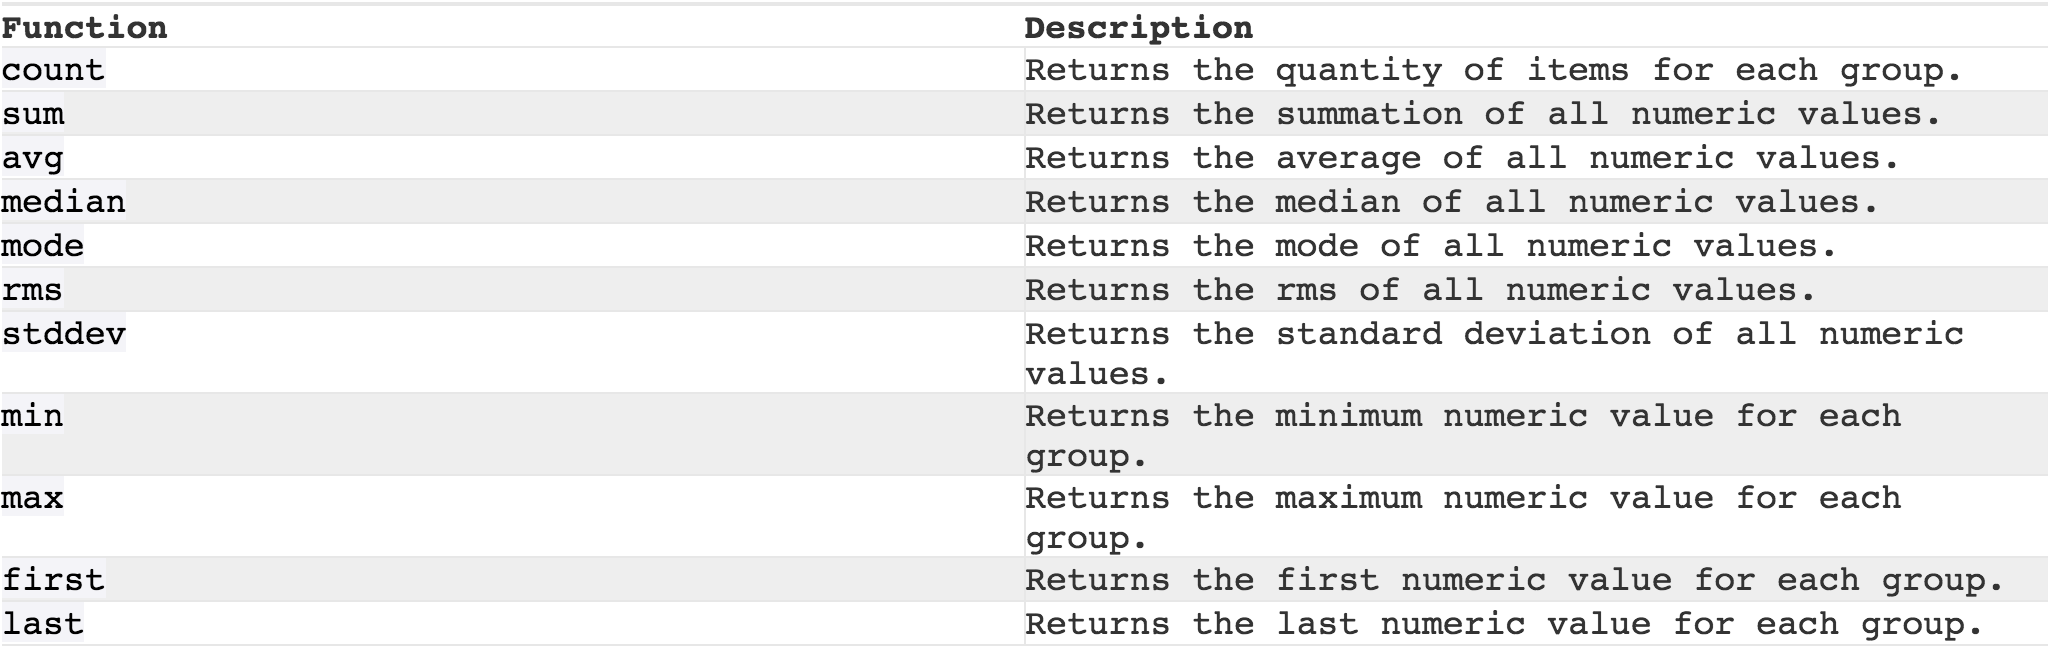

(Cited from https://plot.ly/python/aggregations/)

Therefore, you can use aggregate to do lots of calculation, without extra data processing. Now we just look at the 'mean' function here. 

Assume we want to see the average percentage of votes for Trump to all votes, across states. Percentage of votes for every candidate to all votes across counties are given by the dataset. So, first we need filter the data and only left those for Trump, and then get the mean of 'pct' column of each state. 

In [64]:
color = [[0.0, 'rgb(255,255,255)'],[1.0, 'rgb(0, 0, 0)']]
data = [dict(type = 'choropleth',
    autocolorscale = False,
    colorscale = color,
    locations = voting['st'],
    locationmode = 'USA-states',
    z = voting['pct'],
    
    # Add a list of transforms.
    transforms = [
        dict(type = 'filter',
        target = voting['cand'],
        orientation = '=',
        value = 'Donald Trump'),
        
        dict(type = 'aggregate',
        # This step has the functionality of 'group by', it groups data by some criteria, and aggregate function will
        # be applied to each group.
        # Here we group the data by states, and pick mean value of each state.
        groups = voting['st'],
        # Here you can choose different functions by simply changing 'func'.
        aggregations = [dict(target = 'z', func = 'mean')])
        ]
    )]

layout = dict(
        title = '2016 US President Election: Votes Percentage for Donald Trump',
        geo = dict(
            scope = 'usa',
            projection = dict(type = 'albers usa')
        ))
figure = dict(data = data, layout = layout)
off.iplot(figure, validate = False)

# Summary and reference

This tutorial just highlights a few basic examples and usages of Plotly. It also provides libaries for integration with Matplotlib, Numpy, Pandas and Scikit-learn. Much more details are available on their official document. 
1. Plotly Python Library: https://plot.ly/python/
2. Land Price dataset: http://datatoolkits.lincolninst.edu/subcenters/land-values/land-prices-by-state.asp
3. 2016 US President Election dataset: https://www.kaggle.com/stevepalley/2016uspresidentialvotebycounty/data